<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Generación para el CLUR </font>
</div>

<div align="center"> 
<font size=5> Máscara de telfon </font>
</div>

- **Para**: Fabricación de máscaras en CLUR con laser de femtosegundos

- **Fecha**: 2024/02/28
        
- **Objetivos**: Máscara en teflón para Mahmoud

- **Descripción** - 

- **Referencias**: -

- **Autores**: Luis Miguel Sánchez Brea

In [1]:
from diffractio import np, plt, sp

import ezdxf

In [2]:
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

mm=1.
um=mm/1000.
nm = um/1000.

inches = 25.4*mm

In [3]:
dxf_params = dict(

version="R2000",
total_size=4*inches,
num_masks=(4, 4),
line_size=5*um,
)



# Definitions

In [4]:
def start_drawing(**dxf_params):
    
    version = dxf_params['version']
    total_size = dxf_params['total_size']
    num_masks = dxf_params['num_masks']
    line_size = dxf_params['line_size']
    
    
    dwg = ezdxf.new(version)
    msp = dwg.modelspace()
    total_size = total_size
    num_masks = np.array(num_masks)
    line_size = line_size
    mask_size = (total_size)/np.array(num_masks)  # -5*line_size

    return dwg, msp, mask_size

In [5]:
def rectangle(msp, r0: list[float], size: list[float], origin='0'):
    
    x0, y0 = r0
    sx, sy = size
    
    if origin == '0':
        init_point = np.array([0,0])
    elif origin == 'center':
        init_point = np.array([-sx/2, -sy/2])
    
    # print(init_point)
    points = np.array([(0,0), (sx,0), (sx,sy), (0,sy), (0,0)])
    points = points + r0 + init_point
    msp.add_lwpolyline(points, close=True)
    
    return msp

    


In [6]:
def draw(dwg, msp):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)

In [7]:
def save_png(dwg, filename:str, dpi:int = 300, has_draw: bool = False):


    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(dwg.modelspace(), finalize=True)
    fig.savefig(filename, dpi=dpi)
    if has_draw is False:
        plt.close()

## Draw circles

In [22]:
r0=(0*mm, 0*mm)
pitch = (40*um, 40*um)
radius_external_circle = 12.5*mm/2
radius_hole = 10 * um
area_engraving = 1*mm, 1*mm

In [23]:

x_init = -area_engraving[0]
x_end  = area_engraving[0]
xs=np.arange(x_init, x_end, pitch[0])

y_init = -area_engraving[1]
y_end  = area_engraving[1]
ys=np.arange(y_init, y_end, pitch[1])

num_holes = len(xs)*len(ys)

print(len(xs), len(ys), num_holes)


50 50 2500


In [24]:
dwg, msp, mask_size = start_drawing(**dxf_params)

for x in xs:
    for y in ys:
        r0 = (x,y)
        msp.add_circle(center = r0, radius= radius_hole)

draw(dwg, msp)


name = '240228 clur - mahmoud 1 - circles'
dwg.saveas(name+'.dxf')
save_png(dwg, filename=name+'.png', dpi = 300)

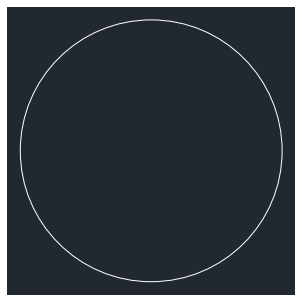

In [21]:
dwg, msp, mask_size = start_drawing(**dxf_params)


msp.add_circle(center = (0,0), radius = radius_external_circle)

draw(dwg, msp)


name = '240228 clur - mahmoud 1 - final_cut'
dwg.saveas(name+'.dxf')
save_png(dwg, filename=name+'.png', dpi = 300)